In [1]:
import pandas as pd
import numpy as np

In [2]:
water = pd.read_csv('./new_water.csv')

In [3]:
water.head()

,Unnamed: 0,loccd,wqdt,temper,wtemper,uBod,uCod,uSs,uTn,uTp,uBac,uVal,bBod,bCod,bSs,bTn,bTp,bBac,bVal
0,1,40001,2019-01-01,-5.0,12.8,271.8,113.415,140.0,78.358,7.398,198000.0,2144.0,0.47,6.240,1.0,13.129,0.098,0.0,1789.0
1,2,40001,2019-01-02,-4.9,12.8,269.4,128.862,190.0,72.257,7.875,206000.0,2151.0,0.56,6.341,0.9,14.291,0.105,0.0,1777.0
2,3,40001,2019-01-03,-3.5,12.8,262.2,115.041,145.0,57.943,3.995,107000.0,2255.0,0.41,6.728,1.0,13.920,0.109,0.0,1847.0
3,4,40001,2019-01-04,-1.1,12.8,202.2,167.886,295.0,74.212,8.263,116000.0,2235.0,0.55,6.850,1.5,11.174,0.109,0.0,1898.0
4,5,40001,2019-01-05,-2.8,12.8,216.0,139.837,185.0,71.325,7.858,101000.0,2037.0,0.55,6.809,1.0,10.287,0.106,0.0,1672.0


In [4]:
# 동부하수처리장의 bBod 예측 : 88001
water_88001 = water[water['loccd'] == 88001]

In [5]:
water_88001.head()

,Unnamed: 0,loccd,wqdt,temper,wtemper,uBod,uCod,uSs,uTn,uTp,uBac,uVal,bBod,bCod,bSs,bTn,bTp,bBac,bVal
403,404,88001,2019-01-01,1.0,14.3,100.3,90.2,165.0,39.972,4.047,170000.0,64070.0,8.5,8.6,4.0,13.621,0.113,270.0,61880.0
404,405,88001,2019-01-02,3.8,13.2,101.5,86.4,161.3,41.392,4.180,190000.0,70616.0,8.5,8.8,3.7,13.901,0.194,300.0,67939.0
405,406,88001,2019-01-03,6.3,13.9,79.0,81.0,160.0,40.824,3.915,180000.0,63060.0,8.4,9.3,2.8,13.616,0.183,280.0,60380.0
406,407,88001,2019-01-04,4.7,13,100.9,97.8,156.3,36.790,4.484,210000.0,64990.0,8.5,12.2,3.7,12.901,0.052,300.0,62720.0
407,408,88001,2019-01-05,5.5,13.2,101.7,90.6,165.0,38.778,3.763,180000.0,68620.0,8.6,12.9,5.3,13.897,0.089,280.0,66380.0


In [7]:
# 필요한 열만 가져오기
water_88001 = water_88001.loc[:, ['wqdt', 'bBod']]

{'whiskers': [<matplotlib.lines.Line2D at 0x17a5b84a490>,
 'caps': [<matplotlib.lines.Line2D at 0x17a5b84ab50>,
 'boxes': [<matplotlib.lines.Line2D at 0x17a5b84a130>],
 'medians': [<matplotlib.lines.Line2D at 0x17a5b85a250>],
 'fliers': [<matplotlib.lines.Line2D at 0x17a5b85a5b0>],
 'means': []}

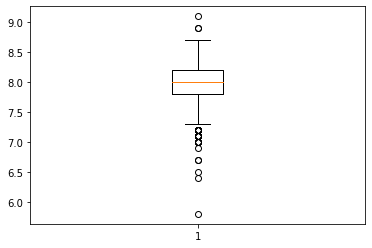

In [8]:
# 이상치 제거
import matplotlib.pyplot as plt
plt.boxplot(water_88001["bBod"])

In [9]:
q1 = np.quantile(water_88001["bBod"], 0.25)
q3 = np.quantile(water_88001["bBod"], 0.75)
iqr = q3 - q1
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)

In [10]:
water_88001_bBod = list(water_88001["bBod"])
water_88001_wqdt = list(water_88001["wqdt"])

for i in range(0, len(water_88001_bBod)):
    if ((water_88001_bBod[i] <= lower_bound)|(water_88001_bBod[i] >= upper_bound)):
        water_88001_bBod[i] = water_88001["bBod"].median()

In [11]:
water_88001 = pd.DataFrame([water_88001_wqdt, water_88001_bBod])
water_88001 = pd.DataFrame(zip(water_88001_wqdt, water_88001_bBod), columns = ['wqdt', 'bBod'])

water_88001

,wqdt,bBod
0,2019-01-01,8.5
1,2019-01-02,8.5
2,2019-01-03,8.4
3,2019-01-04,8.5
4,2019-01-05,8.6
...,...,...
845,2021-06-26,8.0
846,2021-06-27,7.9
847,2021-06-28,8.0
848,2021-06-29,8.0


In [12]:
# 날짜를 인덱스로 만들어주기
water_88001.set_index('wqdt', inplace=True)

In [13]:
water_88001.head()

,bBod
wqdt,
2019-01-01,8.5
2019-01-02,8.5
2019-01-03,8.4
2019-01-04,8.5
2019-01-05,8.6


In [14]:
# !pip install pmdarima

In [15]:
import matplotlib.pyplot as plt
from pmdarima.arima import ndiffs
import pmdarima as pm

<AxesSubplot:xlabel='wqdt'>

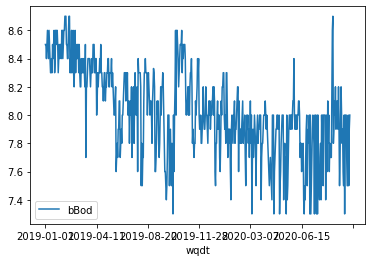

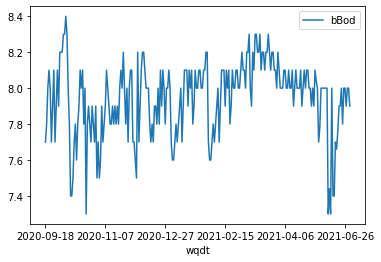

In [16]:
y_train = water_88001[:int(0.7*len(water_88001))]
y_test = water_88001[int(0.7*len(water_88001)):]
y_train.plot()
y_test.plot()

In [17]:
print(y_train)
print(y_test)

            bBod
wqdt            
2019-01-01   8.5
2019-01-02   8.5
2019-01-03   8.4
2019-01-04   8.5
2019-01-05   8.6
...          ...
2020-09-13   7.5
2020-09-14   8.0
2020-09-15   7.5
2020-09-16   7.9
2020-09-17   8.0

[595 rows x 1 columns]
            bBod
wqdt            
2020-09-18   7.7
2020-09-19   7.8
2020-09-20   8.0
2020-09-21   8.1
2020-09-22   8.0
...          ...
2021-06-26   8.0
2021-06-27   7.9
2021-06-28   8.0
2021-06-29   8.0
2021-06-30   7.9

[255 rows x 1 columns]


In [18]:
model = pm.auto_arima(y_train, d = 1, seasonal = True, trace = False)
model.fit(y_train)

ARIMA(order=(2, 1, 1), scoring_args={}, suppress_warnings=True)

In [19]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  595
Model:               SARIMAX(2, 1, 1)   Log Likelihood                 104.003
Date:                Sat, 02 Jul 2022   AIC                           -198.005
Time:                        14:02:58   BIC                           -176.071
Sample:                             0   HQIC                          -189.463
                                - 595                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0005      0.000     -2.101      0.036      -0.001   -3.39e-05
ar.L1          0.3907      0.035     11.117      0.000       0.322       0.460
ar.L2          0.1683      0.036      4.678      0.0

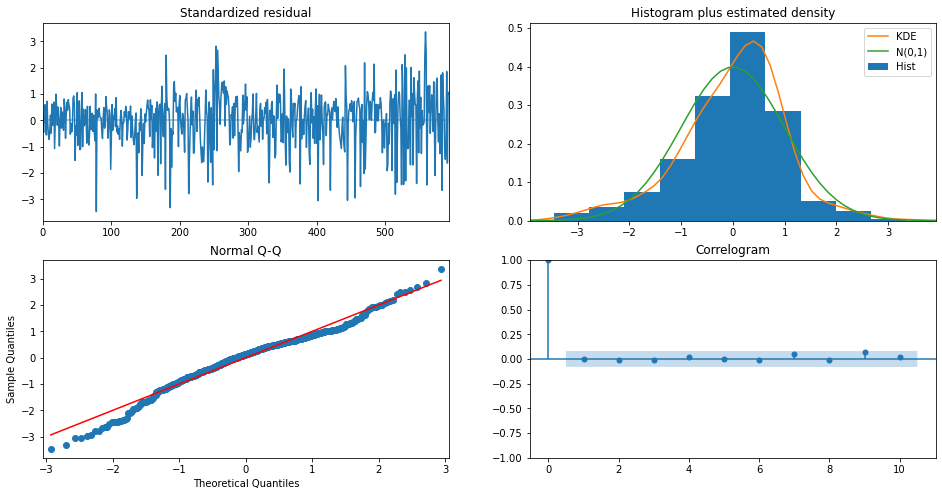

In [20]:
model.plot_diagnostics(figsize = (16, 8))
plt.show()

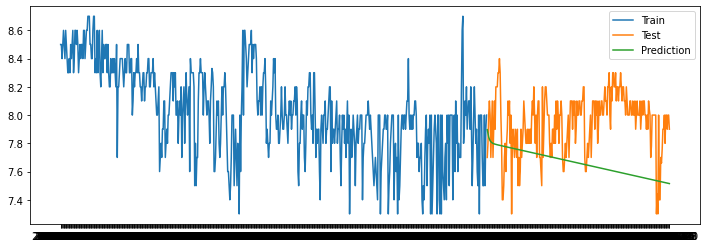

In [26]:
# 테스트 데이터 개수만큼 예측
y_predict = model.predict(n_periods=len(y_test)) 
y_predict = pd.DataFrame(y_predict,index = y_test.index,columns=['Prediction'])

# 그래프
fig, axes = plt.subplots(1, 1, figsize=(12, 4))
plt.plot(y_train, label='Train')        # 훈련 데이터
plt.plot(y_test, label='Test')          # 테스트 데이터
plt.plot(y_predict, label='Prediction')  # 예측 데이터
plt.legend()
plt.show()

In [22]:
y_predict

,Prediction
wqdt,
2020-09-18,7.896543
2020-09-19,7.872440
2020-09-20,7.845109
2020-09-21,7.829868
2020-09-22,7.818810
...,...
2021-06-26,7.519463
2021-06-27,7.518319
2021-06-28,7.517175


In [27]:
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error 

# def MAPEval(y_true, y_pred):
#     return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("MAE : {}".format(round(mean_absolute_error(y_test, y_predict), 3)))
print("MSE : {}".format(round(mean_squared_error(y_test, y_predict), 3)))
print("RMSE : {}".format(round(np.sqrt(mean_squared_error(y_test, y_predict)), 3)))
# print("MAPE : {}".format(round(MAPEval(y_test, y_predict), 3)))

MAE : 0.32
MSE : 0.136
RMSE : 0.368
